# kNN Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Data Hepatitis.csv')
dataBersih = dataset.replace('?', np.NaN)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

dataBersihNew = dataBersih.dropna()
dataBersihNew



X = dataBersihNew.iloc[:, [1,2,3,4,5,6,7,8]].values
y = dataBersihNew.iloc[:, 0].values

#X = X.astype(float)
#y = y.astype(float)

#yBaru = pd.DataFrame(y)
#yBaru



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [ ]:
dataset.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


# Splitting the dataset into the Training set and Test set

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Predicting the Test set results

In [ ]:
import pandas as pd

y_pred = classifier.predict(X_test)
df_pred = pd.DataFrame(y_pred)

# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm

,0,1
0,1,2
1,1,16


In [ ]:
dataBersihNew.head(3)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1


In [ ]:
dataBersih.corr()

,Class,AGE,SEX,ANTIVIRALS,HISTOLOGY
Class,1.000000,-0.219647,0.173051,-0.130196,-0.337856
AGE,-0.219647,1.000000,0.008126,-0.013100,0.170780
SEX,0.173051,0.008126,1.000000,-0.089249,-0.137450
ANTIVIRALS,-0.130196,-0.013100,-0.089249,1.000000,0.209242
HISTOLOGY,-0.337856,0.170780,-0.137450,0.209242,1.000000


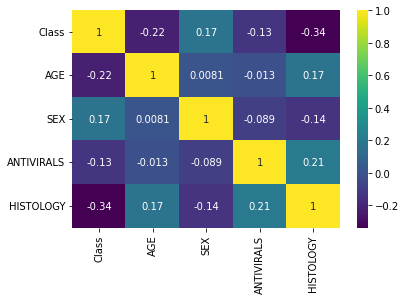

In [ ]:
sns.heatmap(dataBersih.corr(), annot = True, cmap = 'viridis')

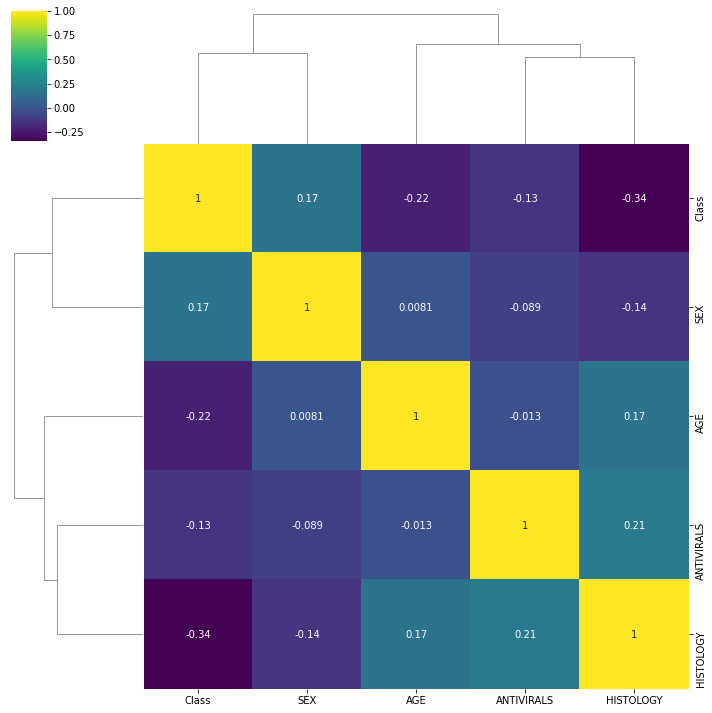

In [ ]:
sns.clustermap(dataBersih.corr(), annot=True ,cmap='viridis')

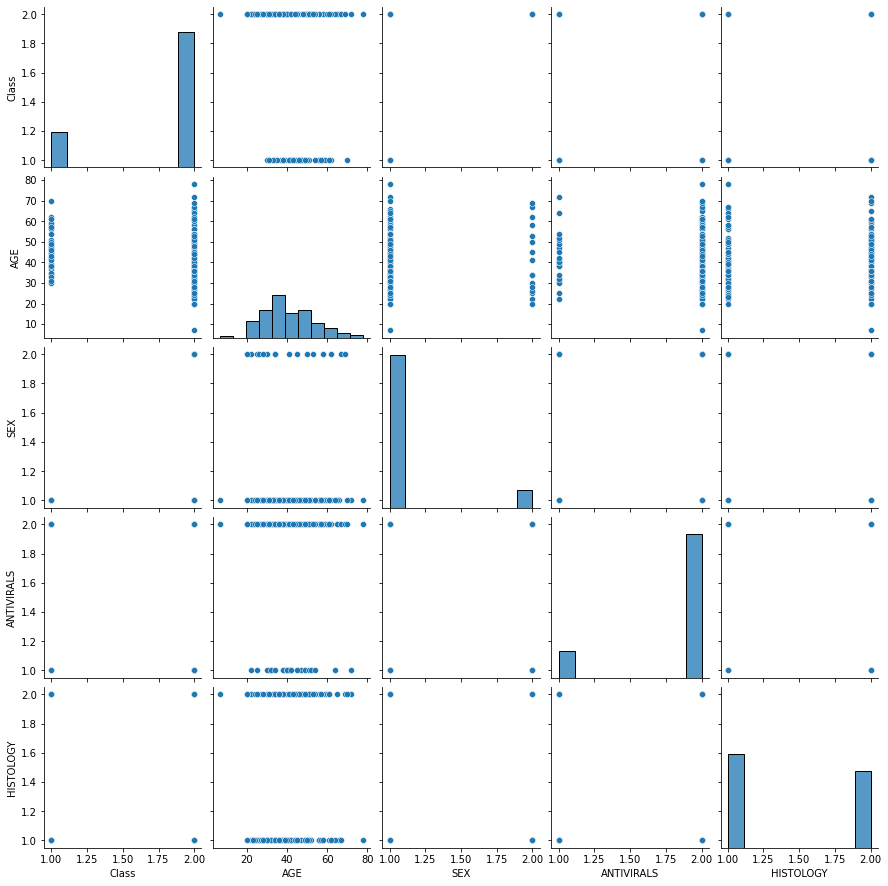

In [ ]:
sns.pairplot(dataBersih)

<Figure size 1440x720 with 0 Axes>

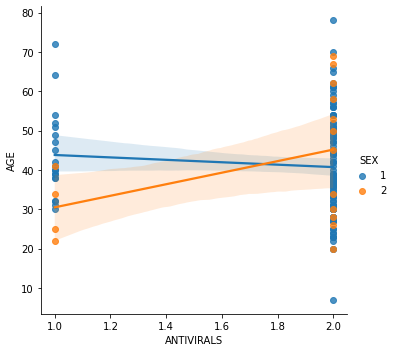

In [ ]:
plt.figure(figsize=(20,10))
sns.lmplot(x='ANTIVIRALS', y = 'AGE',data=dataBersih, hue='SEX')

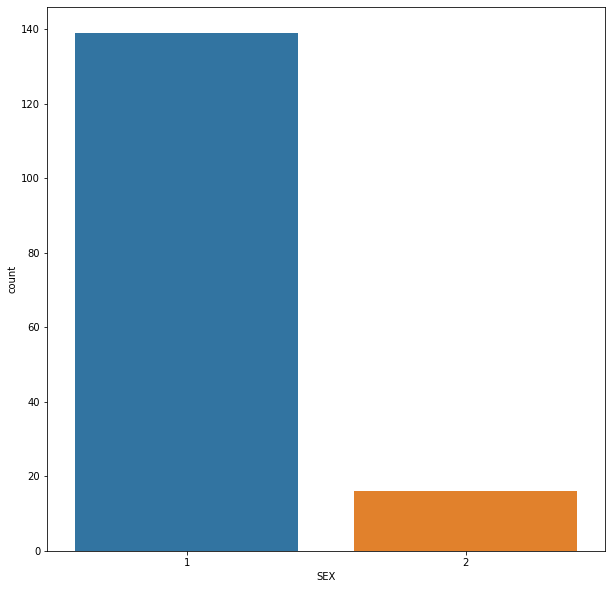

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(x="SEX", data=dataBersih)

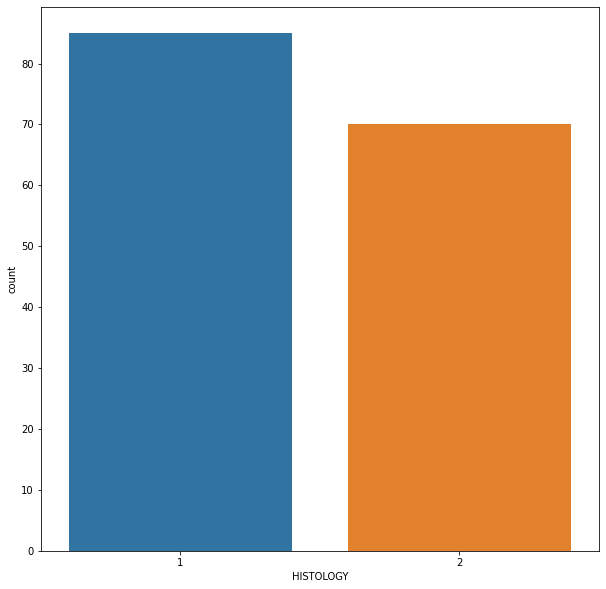

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(x="HISTOLOGY", data=dataBersih)

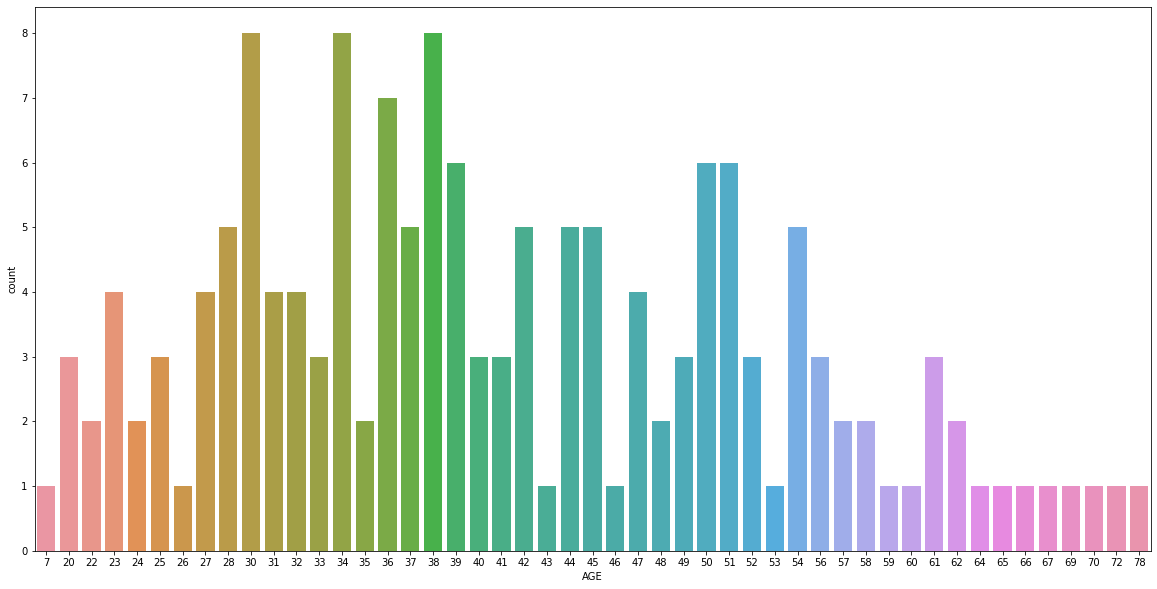

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="AGE", data=dataBersih)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 1440x1440 with 0 Axes>

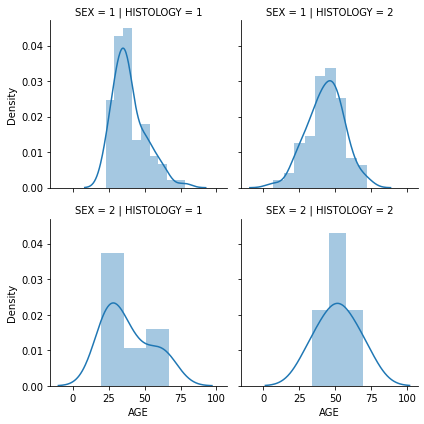

In [ ]:
plt.figure(figsize=(20,20))
sns.FacetGrid(dataBersih, col = 'HISTOLOGY', row = 'SEX').map(sns.distplot, 'AGE')